 # Introduction

Our projects serve to answer one question, "What is the safest neighborhood in Pittsburgh?". We correlated what makes a safe neighborhood to data in the WPRDC, data that could impact a neighborhood in a positive/negative way. Data such as social services, arrests, public schools, and market housing are examples of what we pulled from the WPRDC to be analyzed for our purposes. My metric is Pittsburgh Public Schools. I used this metric because I was familiar with it; I had used it before, which made it simpler when answering the question.

# Metrics : Pittsburgh Public Schools

My metric looks at the public schools in Pittsburgh, this data set provide data such as school names, addresses, zip codes, longitude and latitudes. The idea behind the use of this dataset, is as follow, The neighborhood with the highest density of public schools, was to be considered a safe neighborhood. It can be considered safe due to community engagement, frequent presence of law enforcement or security, etc.... Originally I attended to measure the zip code data of each school, but the end result was not compatible with this choice; and so, the dataset measured to find the safe neighborhood was the longitude and latitude of each school, to get a precise pin. 


In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
%matplotlib inline
import matplotlib.pyplot as plt
from shapely.geometry import Point

# The Best Neighborhood: 





In order to determine the safest neighborhood I targeted the dataset that would give me a visual scene, of the area with the highest density of public school. The longitude and latitude data set. (As you can see and my coding process I had hit a wall and could not continue using the zip code data.) Eventually I was introduced to CRS, coordinate reference system, which had a major impact on how I wanted the final result of the metric to look.  


In [20]:
#load the dataset
school_data = pd.read_csv("PittsburghPublicSchoolsData.csv")
#group by zip code and counts the amount repeated
zip_data = school_data.groupby('zip')['address'].count()
#prints unsorted numbers of schools by zip code
zip_data

zip
15201     5
15203     2
15204     3
15205     3
15206    10
15207     4
15208     6
15210     9
15211     1
15212    15
15213     4
15214     2
15216     6
15217     6
15219     6
15220     2
15221     1
15222     2
15224     2
15226     7
15232     1
15233     5
Name: address, dtype: int64

-Text-

In [21]:
#sort by the number of schools in descending order
zip_sorted = zip_data.sort_values(ascending=False)
#prints all
zip_sorted

zip
15212    15
15206    10
15210     9
15226     7
15219     6
15217     6
15208     6
15216     6
15201     5
15233     5
15213     4
15207     4
15205     3
15204     3
15203     2
15220     2
15222     2
15224     2
15214     2
15211     1
15221     1
15232     1
Name: address, dtype: int64

-Text-

In [103]:
print(gdf.columns)

Index(['OBJECTID', 'fid_blockg', 'statefp10', 'countyfp10', 'tractce10',
       'blkgrpce10', 'geoid10', 'namelsad10', 'mtfcc10', 'funcstat10',
       'aland10', 'awater10', 'intptlat10', 'intptlon10', 'shape_leng',
       'fid_neighb', 'perimeter', 'neighbor_', 'neighbor_i', 'hood', 'hood_no',
       'acres', 'sqmiles', 'dpwdiv', 'unique_id', 'sectors', 'shape_le_1',
       'shape_ar_1', 'page_numbe', 'plannerass', 'created_us', 'created_da',
       'last_edite', 'last_edi_1', 'temp', 'pghdb_sde_', 'GlobalID',
       'Shape__Are', 'Shape__Len', 'geometry', 'school_count'],
      dtype='object')


In [102]:
#create a geometry column from latitude and longitude
#...
school_data['geometry'] = school_data.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)

#convert to GeoDataFrame
school_gdf = gpd.GeoDataFrame(school_data, geometry='geometry', crs="EPSG:4326") #...
school_gdf.head(10)

,sourcedid,name,address,city,state,zip,latitude,longitude,geometry
0,9861,Allderdice Early Headstart,2409 Shady Avenue,Pittsburgh,PA,15217,40.429415,-79.919132,POINT (-79.91913 40.42942)
1,301,Allderdice High School,2409 SHADY AVE,PITTSBURGH,PA,15217,40.429416,-79.919370,POINT (-79.91937 40.42942)
2,204,Allegheny 6-8,810 ARCH ST,PITTSBURGH,PA,15212,40.453231,-80.008655,POINT (-80.00866 40.45323)
3,9863,Allegheny Early Childhood,810 ARCH STREET,Pittsburgh,PA,15212,40.453266,-80.008600,POINT (-80.00860 40.45327)
4,102,Allegheny K-5,810 ARCH ST,PITTSBURGH,PA,15212,40.453181,-80.008895,POINT (-80.00889 40.45318)
5,9995,Arlington Early Childhood Center,800 RECTENWALD ST,PITTSBURGH,PA,15210,40.408701,-79.979321,POINT (-79.97932 40.40870)
6,101,Arlington PreK-8,800 RECTENWALD ST,PITTSBURGH,PA,15210,40.408570,-79.979403,POINT (-79.97940 40.40857)
7,298,Arsenal 6-8,220 40TH STREET,PITTSBURGH,PA,15201,40.468334,-79.961938,POINT (-79.96194 40.46833)
8,9984,Arsenal Early Childhood Center,215 39th Street,PITTSBURGH,PA,15201,40.467193,-79.962831,POINT (-79.96283 40.46719)
9,108,Arsenal PreK-5,215 39th St,PITTSBURGH,PA,15201,40.467372,-79.963409,POINT (-79.96341 40.46737)


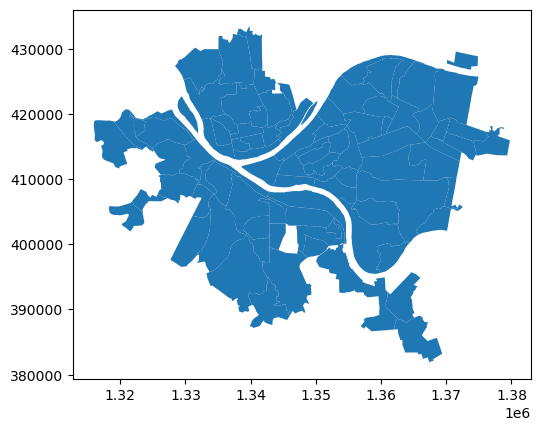

In [76]:
#read in the shapefile
#pitt_neighborhoods = geopandas.read_file(r'C:\Users\Emman\Downloads\Neighborhoods_')
pitt_neighborhoods = gpd.read_file('Neighborhoods_/Neighborhoods_.shp')
#plot the geopandas dataframe
pitt_neighborhoods.plot()
plt.show()


In [87]:
#reproject neighborhoods to match the CRS of school data
pitt_neighborhoods = pitt_neighborhoods.to_crs(school_gdf.crs)
#perform a spatial join to match schools to neighborhoods based on latitude and longitude
school_neighborhoods = gpd.sjoin(school_gdf, pitt_neighborhoods, how='left', predicate='within')
#group by neighborhood and count the number of schools in each neighborhood
neighborhood_school_counts = school_neighborhoods.groupby('hood').size()

#merge the school counts back into the neighborhood GeoDataFrame
pitt_neighborhoods['school_count'] = pitt_neighborhoods['hood'].map(neighborhood_school_counts).fillna(0)



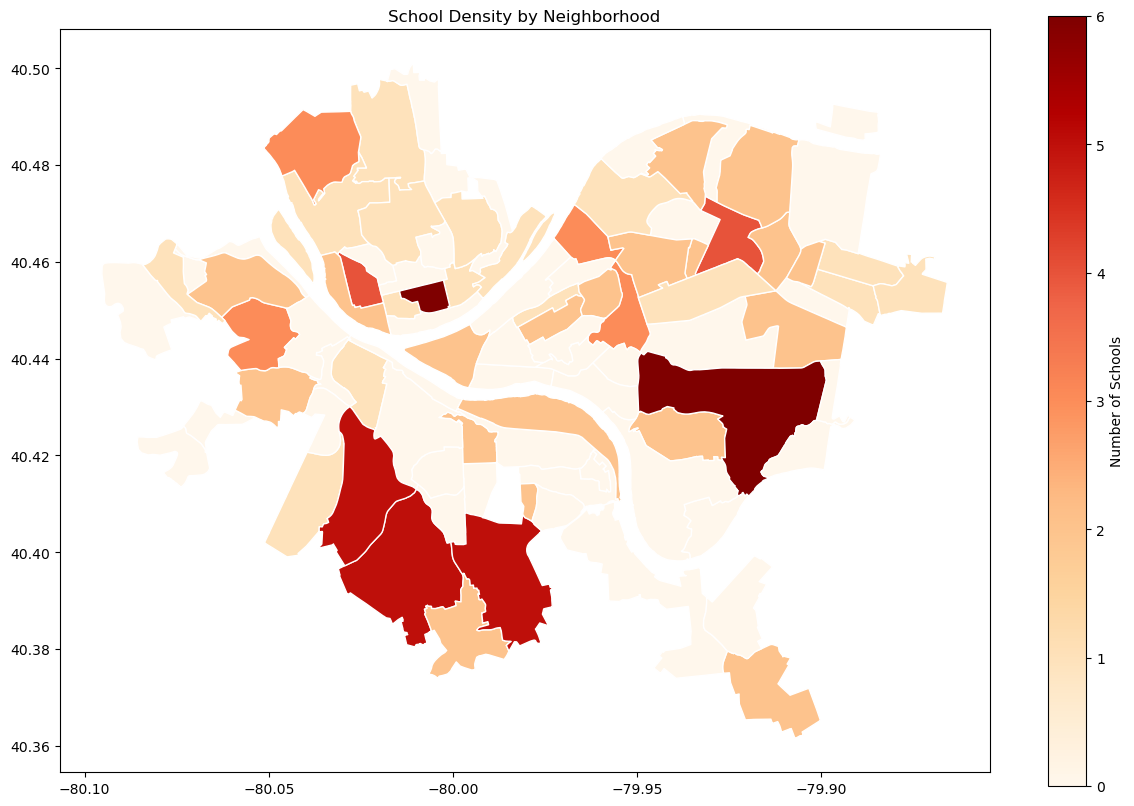

In [82]:
#plot a choropleth map of school counts by neighborhood
pitt_neighborhoods.plot(column='school_count', 
                        cmap='OrRd',              # Choose a color palette
                        edgecolor="white",        # Outline neighborhoods in white
                        legend=True,              # Show the legend
                        legend_kwds={'label': "Number of Schools"}, 
                        figsize=(15, 10),        
                        missing_kwds={"color": "lightgrey"}) #handle neighborhoods with no schools

#title and show the plot
plt.title('School Density by Neighborhood')
plt.show()

In [101]:
#sort neighborhoods by school density
top_neighborhoods = pitt_neighborhoods.sort_values(by='school_count', ascending=False)
#show the top neighborhoods
print(top_neighborhoods[['hood', 'school_count']].head())

                   hood  school_count
45     Allegheny Center           6.0
80  Squirrel Hill South           6.0
51              Carrick           5.0
24            Brookline           5.0
72            Beechview           5.0


# Conclusion

Finally, Allegheny Center (located in Northside) is concluded to be the best neighborhood for this sub metric of public Pittsburgh schools. Being that the highest density of public school is located in Allegheny Center. You can tell by looking for the area with the shade of deep red, and light red being less public schools.